# Train
## Use this notebook for training new feedforward style transfer models

This notebook will load the coco dataset and train a custom style image that the user can upload.
The user can save the model and visualize the results on the chicago.jpg image.
To add your own style, load your own style image and change the loss input in the model.compile function.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from trainer.utils import losses
from trainer.utils.utils import load_img, imshow
from trainer.models.transformer import transformer_model

Coco takes a long time to download and requires ~37GB of disk space. We resize the images to 256 by 256 here but the model also works at other input image sizes

In [2]:
coco_dataset = tfds.load('coco/2014', split=tfds.Split.TRAIN)
def resize_and_pair(ele):
  image = ele['image']
  image = tf.image.resize(image, (256, 256))
  return image, image
images = coco_dataset.map(resize_and_pair, num_parallel_calls=tf.data.experimental.AUTOTUNE)
images = images.batch(4).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

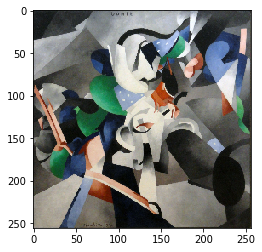

In [3]:
la_muse = load_img('images/styles/la_muse.jpg')
la_muse = tf.image.resize(la_muse, [256, 256])
scream = load_img('images/styles/the_scream.jpg')
scream = tf.image.resize(scream, [256, 256])
feathers = load_img('images/styles/feathers.jpg')
feathers = tf.image.resize(feathers, [256, 256])
candy = load_img('images/styles/candy.jpg')
candy = tf.image.resize(candy, [256, 256])
composition = load_img('images/styles/composition_vii.jpg')
composition = tf.image.resize(composition, [256, 256])
mosaic = load_img('images/styles/mosaic.jpg')
mosaic = tf.image.resize(mosaic, [256, 256])
udnie = load_img('images/styles/udnie.jpg')
udnie = tf.image.resize(udnie, [256, 256])
# or load custom style
imshow(udnie.numpy().astype('uint8'))

In [4]:
model = transformer_model()

created


In [ ]:
# use this block to continue training a style image
# model.load_weights('trained_models/outputs/udnie_resizestyle_sw5_cw1_tv1e-4_coco_test.h5')

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=losses.full_loss(udnie)) # change udnie to custom style
model.fit(images, epochs=2, steps_per_epoch=None, use_multiprocessing=False)

Epoch 1/50
   1250/Unknown - 304s 243ms/step - loss: 160098.0262

KeyboardInterrupt: 

In [7]:
# save your trained model
model.save('trained_models/user_outputs/udnie_resizestyle_sw5_cw1_tv1e-4_coco_test.h5')

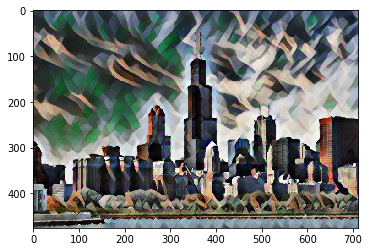

In [8]:
chicago = load_img('images/input/chicago.jpg')
results = model.predict(chicago)
plt.imshow(results[0].astype(np.uint8))

In [9]:
# save your visualization
results = tf.dtypes.cast(results[0], tf.uint8)
encoded_str = tf.image.encode_jpeg(tf.squeeze(results),quality=100)
tf.io.write_file('images/outputs/testoutput.jpg', encoded_str)